<a href="https://colab.research.google.com/github/SKamara84/Weather_info/blob/main/RArimaDaialy81_24.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Daily Rainfall Data: January 1981 to 2024
- Load data and display first few rows

In [11]:
import pandas as pd

# Read the CSV file
df = pd.read_csv('DailRainfall_81_24.csv')


import google.colab
from google.colab import data_table
data_table.enable_dataframe_formatter()

# Display first few rows
print(df.head())

    time_start  precipitation
0  Jan 1, 1981          0.000
1  Jan 2, 1981          0.000
2  Jan 3, 1981          0.000
3  Jan 4, 1981          0.168
4  Jan 5, 1981          0.230


# Preprocessing: format columns
Parse the specified column as a datetime object and set it as the index

In [12]:
import matplotlib.pyplot as plt
import seaborn as sns

# Convert time_start to datetime and set as index
df['time_start'] = pd.to_datetime(df['time_start'])
df.set_index('time_start', inplace=True)



Plot the time series

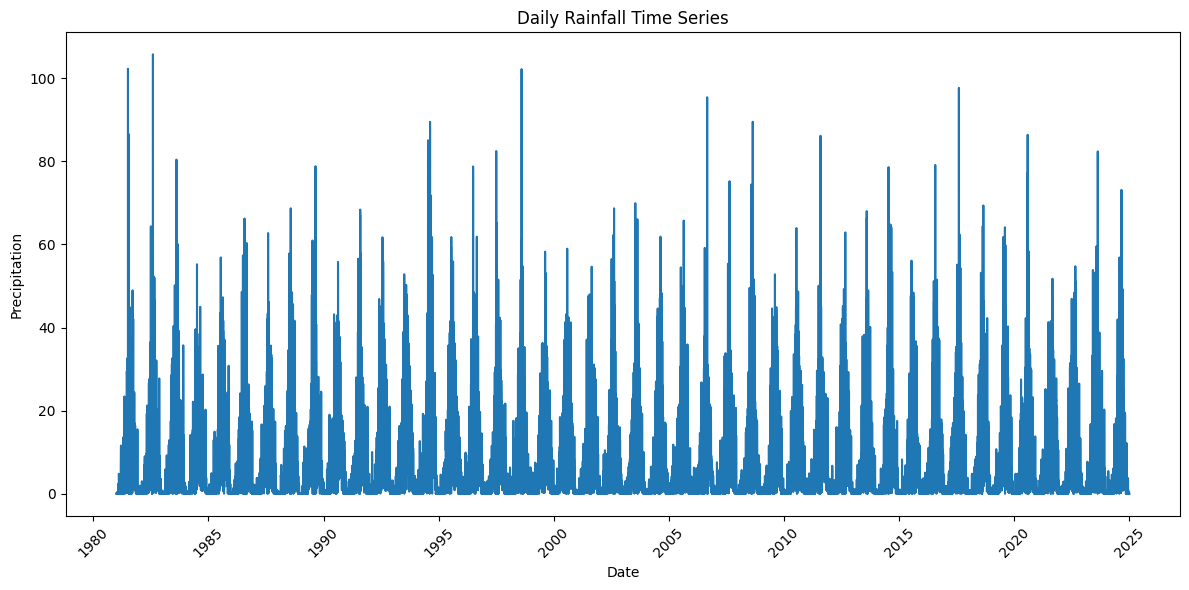

In [13]:

# Create the plot
plt.figure(figsize=(12, 6))
sns.lineplot(data=df, x=df.index, y='precipitation')
plt.title('Daily Rainfall Time Series')
plt.xlabel('Date')
plt.ylabel('Precipitation')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

Visualize the first few rows and columns

In [15]:
df.head(10)

,precipitation
time_start,
1981-01-01,0.000
1981-01-02,0.000
1981-01-03,0.000
1981-01-04,0.168
1981-01-05,0.230
1981-01-06,0.000
1981-01-07,0.000
1981-01-08,0.000
1981-01-09,0.000


Resmaple data

In [17]:
# Resample to monthly totals
monthly_rainfall = df.resample('ME')['precipitation'].sum()

Decompose into time series, trend, seasonality, and residual
- The trend shows the long-term pattern in rainfall
- The seasonal component reveals the yearly rainfall cycle
- The residuals show the random variations after removing trend and seasonality

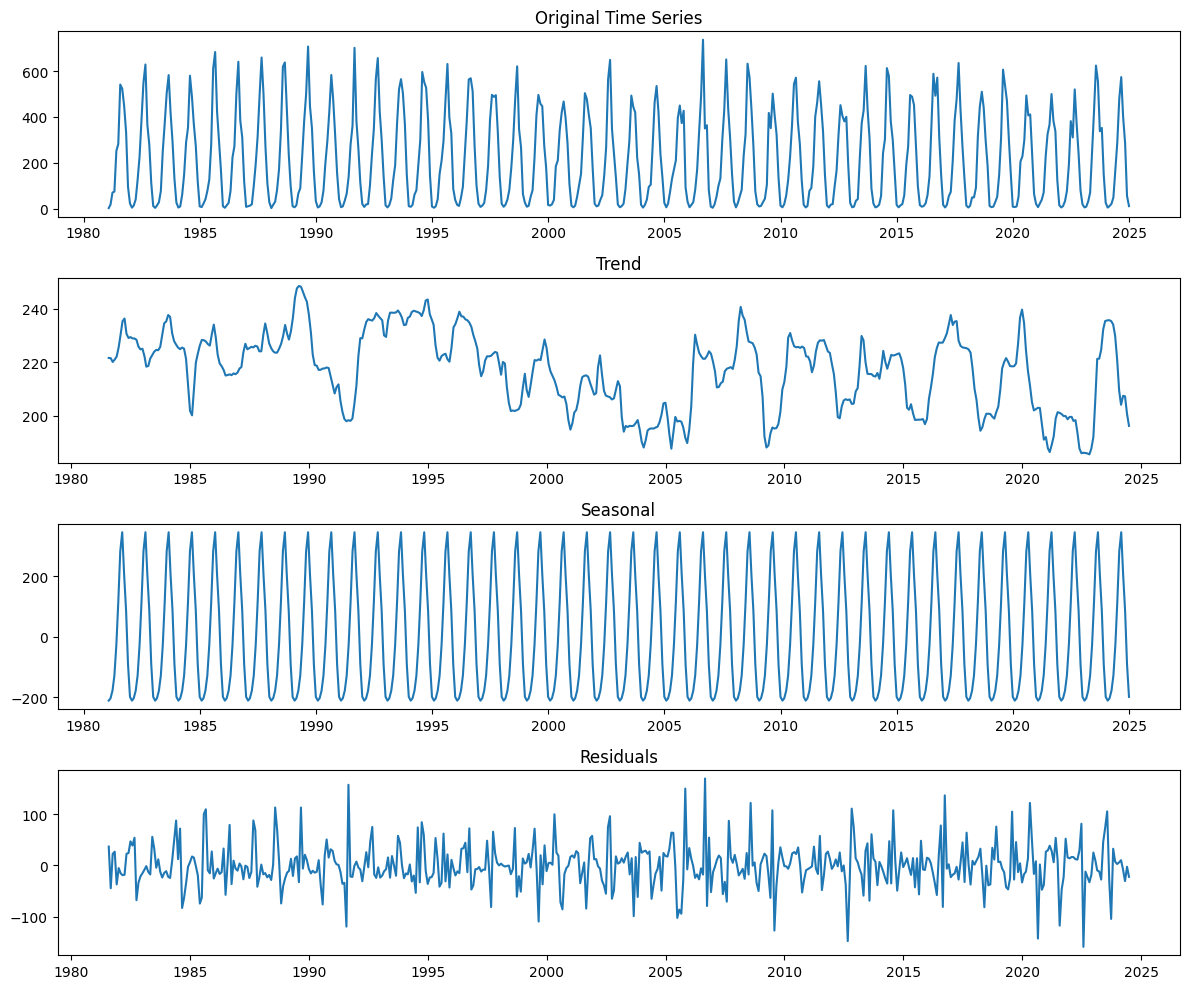

In [18]:
from statsmodels.tsa.seasonal import seasonal_decompose
decomposition = seasonal_decompose(monthly_rainfall, model='additive', period=12)

# Perform seasonal decomposition
# decomposition = seasonal_decompose(monthly_rainfall, period=12)

# Create subplots for the decomposition
fig, (ax1, ax2, ax3, ax4) = plt.subplots(4, 1, figsize=(12, 10))

ax1.plot(monthly_rainfall)
ax1.set_title('Original Time Series')

ax2.plot(decomposition.trend)
ax2.set_title('Trend')

ax3.plot(decomposition.seasonal)
ax3.set_title('Seasonal')

ax4.plot(decomposition.resid)
ax4.set_title('Residuals')

plt.tight_layout()
plt.show()


Stationarity test
- Perform stationarity tests (e.g., ADF test) and display the results

- The test results indicate that the time series is stationary:

 - The test statistic (-4.66) is more negative than all critical values
 - The p-value (0.0001) is well below 0.05
 - We reject the null hypothesis of non-stationarity

In [19]:
from statsmodels.tsa.stattools import adfuller

# Perform ADF test
adf_result = adfuller(monthly_rainfall)

# Print results
print('ADF Test Results:')
print('Test Statistic:', adf_result[0])
print('p-value:', adf_result[1])
print('\
Critical Values:')
for key, value in adf_result[4].items():
    print('\	%s: %.3f' % (key, value))

ADF Test Results:
Test Statistic: -4.660698347575702
p-value: 9.968435255746154e-05
Critical Values:
\	1%: -3.443
\	5%: -2.867
\	10%: -2.570


# Model Selection
Given the strong seasonal component we observed earlier and the confirmed stationarity of the series, a SARIMA (Seasonal ARIMA) model would be appropriate for this data. This will allow us to capture both the seasonal patterns and the regular autoregressive and moving average components.

- Fit the model for the monthly rainfall data

In [20]:
!pip install pmdarima

import pmdarima as pm
from statsmodels.tsa.statespace.sarimax import SARIMAX
import numpy as np

# Fit auto SARIMA
model = pm.auto_arima(monthly_rainfall,
                     seasonal=True,
                     m=12,
                     suppress_warnings=True,
                     stepwise=True)

print("Best SARIMA model parameters:")
print("ARIMA order:", model.order)
print("Seasonal order:", model.seasonal_order)

# Fit SARIMAX with the determined orders
final_model = SARIMAX(monthly_rainfall,
                     order=model.order,
                     seasonal_order=model.seasonal_order)
results = final_model.fit()

# Print model summary
print("\
Model Summary:")
print(results.summary().tables[1])

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.2/2.2 MB 30.4 MB/s eta 0:00:00


/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11

Best SARIMA model parameters:
ARIMA order: (0, 0, 1)
Seasonal order: (2, 0, 0, 12)


/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/statespace/sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'


Model Summary:
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ma.L1          0.0752      0.035      2.135      0.033       0.006       0.144
ar.S.L12       0.4851      0.032     15.217      0.000       0.423       0.548
ar.S.L24       0.5018      0.032     15.853      0.000       0.440       0.564
sigma2      2935.9954    115.432     25.435      0.000    2709.752    3162.239


# Generate and plot rainfall forecast
- The forecast suggests that rainfall patterns will continue to follow historical seasonal patterns, with predicted monthly rainfall averaging around 207mm. The wide confidence intervals reflect the inherent variability in rainfall patterns.




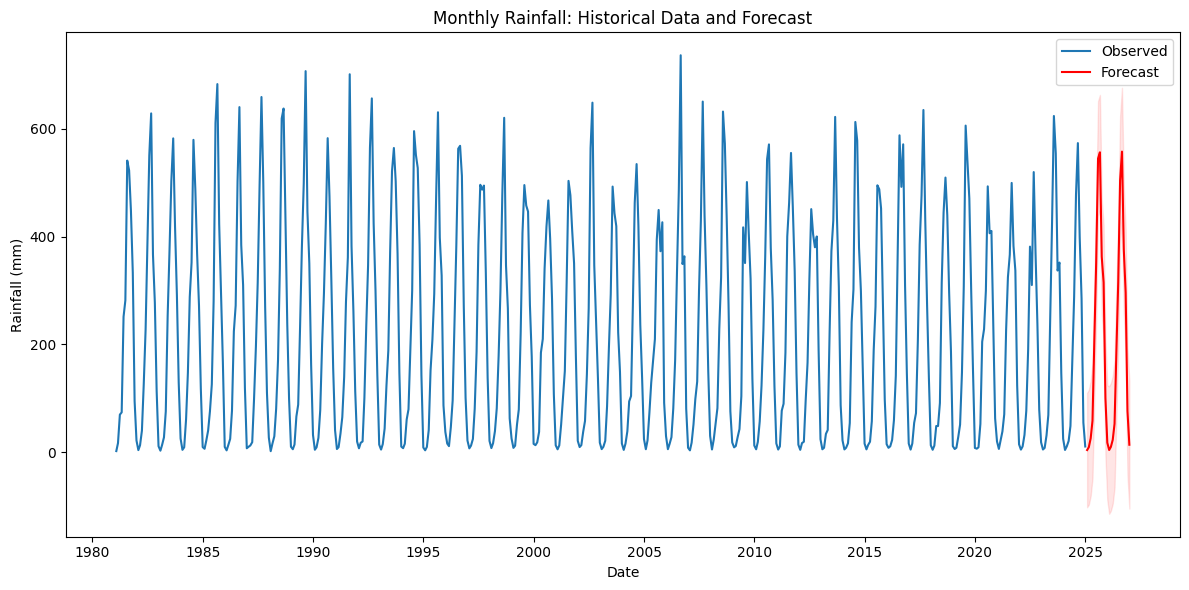

Forecast Summary Statistics:
count     24.000000
mean     207.314949
std      200.834837
min        4.126775
25%       21.727986
50%      144.387226
75%      354.900107
max      557.706881
Name: predicted_mean, dtype: float64


In [25]:
# Generate forecast
forecast_steps = 24  # 2 years ahead
forecast = results.get_forecast(steps=forecast_steps)
forecast_mean = forecast.predicted_mean
forecast_ci = forecast.conf_int()

# Plot the results
plt.figure(figsize=(12, 6))
plt.plot(monthly_rainfall.index, monthly_rainfall, label='Observed')
plt.plot(forecast_mean.index, forecast_mean, color='r', label='Forecast')
plt.fill_between(forecast_ci.index,
                forecast_ci.iloc[:, 0],
                forecast_ci.iloc[:, 1],
                color='r', alpha=0.1)
plt.title('Monthly Rainfall: Historical Data and Forecast')
plt.xlabel('Date')
plt.ylabel('Rainfall (mm)')
plt.legend()
plt.tight_layout()
plt.show()

print("\
Forecast Summary Statistics:")
print(forecast_mean.describe())

Save the results

In [26]:
# Save forecast results to CSV
forecast_df = pd.DataFrame({
    'predicted_mean': forecast_mean,
    'lower_ci': forecast_ci.iloc[:, 0],
    'upper_ci': forecast_ci.iloc[:, 1]
})
forecast_df.to_csv('rainfall_forecast_results.csv')
print("Forecast results saved to rainfall_forecast_results.csv")

Forecast results saved to rainfall_forecast_results.csv
